In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
top_left = cv2.imread('top_left[1].jpg')
print(top_left.shape)

(570, 570, 3)


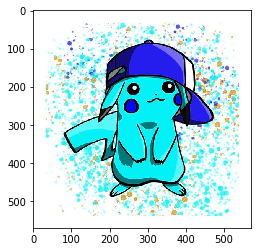

In [3]:
plt.imshow(top_left);

In [4]:
top_left_img = cv2.cvtColor(top_left , cv2.COLOR_BGR2RGB)
top_left_img = cv2.resize(top_left_img , (200,200))

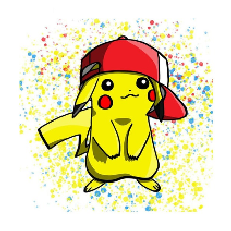

In [5]:
plt.imshow(top_left_img)
plt.axis('off')
plt.show()

In [6]:
top_left_img.shape

(200, 200, 3)

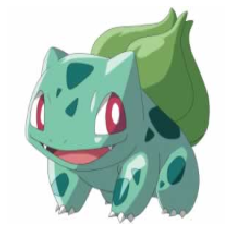

(200, 200, 3)


In [7]:
top_right = cv2.imread('top_right[1].jpg')
top_right_img = cv2.cvtColor(top_right , cv2.COLOR_BGR2RGB)
top_right_img = cv2.resize(top_right_img , (200,200))
plt.imshow(top_right_img)
plt.axis('off')
plt.show()
print(top_right_img.shape)

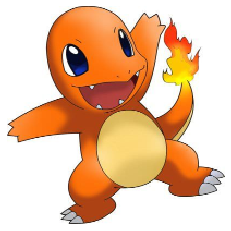

(200, 200, 3)


In [8]:
bottom_left = cv2.imread('bottom_left[1].jpg')
bottom_left_img = cv2.cvtColor(bottom_left , cv2.COLOR_BGR2RGB)
bottom_left_img = cv2.resize(bottom_left_img , (200,200))
plt.imshow(bottom_left_img)
plt.axis('off')
plt.show()
print(bottom_left_img.shape)

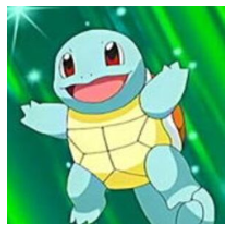

(200, 200, 3)


In [9]:
bottom_right = cv2.imread('bottom_right[1].jpg')
bottom_right_img = cv2.cvtColor(bottom_right , cv2.COLOR_BGR2RGB)
bottom_right_img = cv2.resize(bottom_right_img , (200,200))
plt.imshow(bottom_right_img)
plt.axis('off')
plt.show()
print(bottom_right_img.shape)

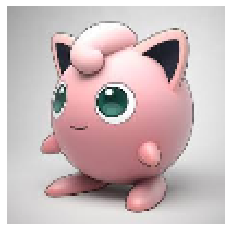

(100, 100, 3)


In [10]:
center = cv2.imread('center[1].jpeg')
center_img = cv2.cvtColor(center , cv2.COLOR_BGR2RGB)
center_img = cv2.resize(center_img , (100, 100))
plt.imshow(center_img)
plt.axis('off')
plt.show()
print(center_img.shape)

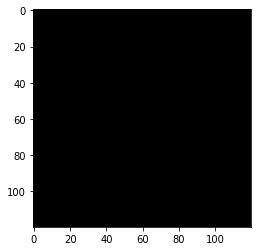

In [11]:
b1 = np.zeros((120, 120, 3) , dtype='uint8')
plt.imshow(b1);

In [12]:
b1[10:110 , 10:110] = center_img

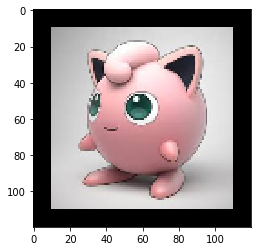

In [13]:
plt.imshow(b1);

In [14]:
b1.shape

(120, 120, 3)

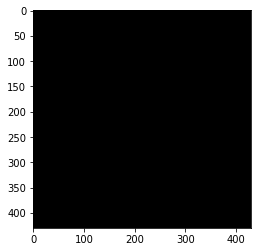

In [15]:
b2 = np.zeros((430, 430, 3) , np.uint8)
plt.imshow(b2);

In [16]:
b2[10:210 , 10:210] = top_left_img
b2[10:210 , 220:420] = top_right_img

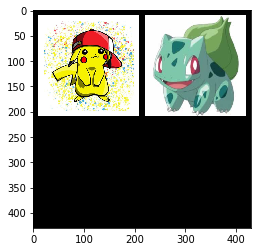

In [17]:
plt.imshow(b2)
plt.show()

In [18]:
b2[220:420 , 10:210] = bottom_left_img
b2[220:420 , 220:420] = bottom_right_img

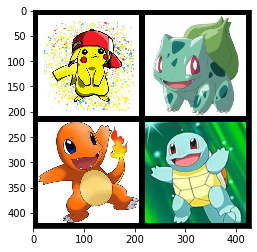

In [19]:
plt.imshow(b2)
plt.show()

In [20]:
b2[155:275 , 155:275] = b1

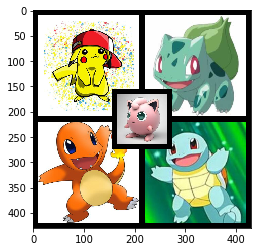

In [21]:
plt.imshow(b2)
plt.show()

In [22]:
b2.shape

(430, 430, 3)

In [23]:
print(b2)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [35]:
img = cv2.cvtColor(b2 , cv2.COLOR_RGB2BGR)
cv2.imwrite('final_collage.jpeg' , img)

True

In [25]:
r_channel = img[:,:,2]
g_channel = img[:,:,1]
b_channel = img[:,:,0]

print(r_channel.shape)

(430, 430)


In [26]:
r_channel = r_channel.reshape((430*430 , 1))
g_channel = g_channel.reshape((430*430 , 1))
b_channel = b_channel.reshape((430*430 , 1))
image = np.hstack((r_channel , g_channel , b_channel))

In [27]:
print(image.shape)

(184900, 3)


In [28]:
df = pd.DataFrame(image , columns = ['r','g','b'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184900 entries, 0 to 184899
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   r       184900 non-null  uint8
 1   g       184900 non-null  uint8
 2   b       184900 non-null  uint8
dtypes: uint8(3)
memory usage: 541.8 KB


In [34]:
df.to_csv('Photo_Collage.csv', index = False)